# Introducción a la paquetería Statsmodels de Python

`statsmodels` es una biblioteca de Python diseñada específicamente para el análaisis estadístico clásico, orientada a la inferencia estadística, permitiendo explorar, estimar y evaluar modelos con base en fundamentos teóricos rigurosos.

## Importación de librerías

In [34]:
import numpy as np # utilizada para operaciones numéricas y manejo de arrays
import pandas as pd # herramienta fundamental para manipular y analizar datos estructurados (DataFrames)
import statsmodels.api as sm # Interfaz principal de statsmodels, de bajo nivel
import statsmodels.formula.api as smf # Interfaz basada en fórmulas (estilo R), útil para especificar modelos de forma más intuitiva
import matplotlib.pyplot as plt # utilizada para realizar gráficos

## Importación de dataset

El dataset importado en este caso viene ya dentro de la paquetería de `statsmodels`. Se carga el dataset "Guerry" desde el paquete "HistData", disponible en statsmodels, que contiene datos históricos sobre crimen, alfabetización, y otras variables socioeconómicas en departamentos de Francia en el siglo XIX. El conjunto de datos proviene del trabajo de André-Michel Guerry (1833), quien utilizó estadísticas sociales para analizar temas como el crimen y la educación. Este dataset es muy utilizado para practicar regresión, visualización y exploración de datos.

In [6]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [7]:
# Como podemos ver, esto lo carga como un objeto DataFrame de Pandas
type(df)

pandas.core.frame.DataFrame

In [8]:
# Imprimimos las primeras líneas para ver la carga correcta de los datos
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,73,58,11,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,22,10,82,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,61,66,68,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,76,49,5,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,83,65,10,22,23,64,79,35,7,1,320.280,5549,129.10


In [11]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dept             86 non-null     int64  
 1   Region           85 non-null     object 
 2   Department       86 non-null     object 
 3   Crime_pers       86 non-null     int64  
 4   Crime_prop       86 non-null     int64  
 5   Literacy         86 non-null     int64  
 6   Donations        86 non-null     int64  
 7   Infants          86 non-null     int64  
 8   Suicides         86 non-null     int64  
 9   MainCity         86 non-null     object 
 10  Wealth           86 non-null     int64  
 11  Commerce         86 non-null     int64  
 12  Clergy           86 non-null     int64  
 13  Crime_parents    86 non-null     int64  
 14  Infanticide      86 non-null     int64  
 15  Donation_clergy  86 non-null     int64  
 16  Lottery          86 non-null     int64  
 17  Desertion        8

## Sintaxis de Statsmodels

Se realiza un ajuste de mínimos cuadrados ordinarios (OLS) utilizando el logaritmo natural de una variable.

### Sintaxis con fórmulas (como R)

In [16]:
# Fit OLS regression
res = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=df)

In [18]:
# El tipo de este objetos es un modelo lineal OLS de statsmodels, todavía no ha sido ajustado a los datos
type(res)

statsmodels.regression.linear_model.OLS

In [20]:
# Se ajusta a los datos
lm = res.fit()

In [22]:
# El tipo de objeto cambia
type(lm)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [26]:
# Podemos obtener un resumen rápido de lo encontrado en el ajuste
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.90e-08
Time:                        13:59:26   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al ajustar un modelo con `statsmodels`, el método `.summary()` devuelve un ersumen estadístico completo, con las siguientes características.

* **Dep. Variable**: variable dependiente (de respuesta).
* **Model**: tipo de modelo ajustado.
* **Method**: método de estimación.
* **R-squared ($R^2$)**: métrica de R2, proporción de la variabilidad explicada por el modelo. Varía entre 0 y 1.
* **Adj. R-squared**: métrica R2 ajustada, donde se penaliza la inclusión de varias variables. Se utiliza para ver la inclusión de variables irrelevantes en el modelo.
* **F-statistic**: prueba conjunta de significancia de los regresores ($H_0:$ todos los coeficientes son iguales a cero)
* **Prob (F-statistic)**: p-valor asociado a la prueba F.
* **Log-Likelihood**: logaritmo de la verosimilitud (se usa en modelos más complejos).
* **AIC/BIC**: criterios de información de Akaike y Bayesiano, útiles para comparar modelos (más bajo = mejor)
* **No. Observations**: Número de observaciones ($n$).
* **Df Model / Residuals**: Grados de libertad del modelos y los residuos.

### Sintaxis con arrays de numpy

In [65]:
n_obs = 100 # número de observaciones
X = np.random.random((n_obs, 2)) # cada una de las n observaciones consta de un array de dos elementos (variables) x1 y x2.
X = sm.add_constant(X) # agrega una nueva columna (variable) con un valor constante (por default es 1).

In [66]:
beta = [1, 0.1, 0.5] # coeficientes de la regresión
e = np.random.random(n_obs) / 100 # se crea un error aleatorio (por default entre 0 y 1)
y = np.dot(X, beta) + e # ecuación de una recta (multivariable)

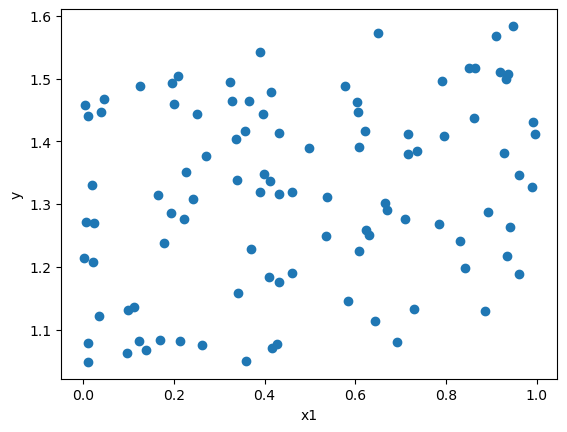

In [70]:
plt.scatter(X[:,1],y) # se hace un scatterplot con matplotlib
plt.ylabel('y')
plt.xlabel('x1')
plt.show()

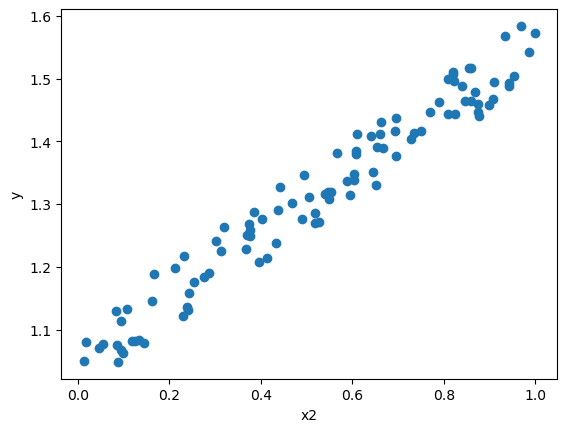

In [72]:
plt.scatter(X[:,2],y) # se hace un scatterplot con matplotlib
plt.ylabel('y')
plt.xlabel('x2')
plt.show()

Como se observa, se crean datos ficticios con numpy. Se utiliza la ecuación de la recta para dos variables $x_1$ y $x_2$, y se guarda todo en arrays de numpy. La interfaz principal de statsmodels `statsmodels.api.sm` puede leer de estos arrays de numpy, en lugar de un dataframe.

In [73]:
res_2 = sm.OLS(y,X).fit()

In [74]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.385e+05
Date:                Thu, 22 May 2025   Prob (F-statistic):          2.45e-168
Time:                        15:14:48   Log-Likelihood:                 448.05
No. Observations:                 100   AIC:                            -890.1
Df Residuals:                      97   BIC:                            -882.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0047      0.001   1406.428      0.000       1.003       1.006
x1             0.1007      0.001    110.674      0.000       0.099       0.103
x2             0.4999      0.001    508.380      0.000       0.498       0.502
==============================================================================
Omnibus:                       26.298   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.710
Skew:                          -0.125   Prob(JB):                       0.0576
Kurtosis:                       1.856   Cond. No.                         5.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary del modelo ajustado

Todas los valores que se observan en el resumen del modelo ajustado se encuentran almacenadas en un atributo del objeto de Python para el summary. Podemos utilizar la función `dir()`para desplegar todas los atributos que se encuentran dentro de un objeto.

In [75]:
dir(res_2)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 

Podemos llamar a cada uno de estos valores por separado. Por ejemplo, el número de observaciones.

In [77]:
res_2.nobs # numero de observaciones

100.0